# Estimating Energy Load Requirements for Building

### 1. Introduction
### 2. Libraries
### 3. Preparation and Exploration of data
### 4. Data Analysis
### 5. Data Exploratory Visualisation
### 6. Data Explanatory Visualisation


## 1. Introduction


Heating, Ventilation, Air Conditioning make up a major load of energy usage for a building. Hence factors that go into heating or cooling matter while designing a building.

So in this project we look into Surface Area, Relative Compactness, Wall Area, Roof Area, Glazing Area, Overall Height, Glazing Area Distribution of a building and predict how relevant these into estimating our energy loads for a building.

## 2. Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
%matplotlib inline

## 3. Preparation and exploration of data

First, we read the data into pandas dataframe and assign column names, then using unique attribute of the dataframe  we explore all the unique values of the data and also we find out through the unique values whether the data has any null values.

In [2]:
data = pd.read_csv('data.csv')
data.columns=['Relative Compactness','Surface Area','Wall Area','Roof Area',
              'Overall Height','Orientation','Glazing Area','Glazing Area Distribution',
              'Heating Load (KW)','Cooling Load (KW)']
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load (KW),Cooling Load (KW)
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
print(data['Glazing Area'].unique())
print(data['Overall Height'].unique())
print(data['Orientation'].unique())
print(data['Surface Area'].unique())
print(data['Wall Area'].unique())
print(data['Roof Area'].unique())
print(data['Relative Compactness'].unique())
print(data['Glazing Area Distribution'].unique())

[0.   0.1  0.25 0.4 ]
[7.  3.5]
[2 3 4 5]
[514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]
[294.  318.5 343.  416.5 245.  269.5 367.5]
[110.25 122.5  147.   220.5 ]
[0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]
[0 1 2 3 4 5]


# Data Analysis

## We do null hypothesis analysis to check if the data is normally distributed.

In [4]:
columns = list(data.columns)
for i in range(len(columns)):
    stat, p = st.normaltest(data[columns[i]])
    print(f'statistic = {stat}, p = {p}')
    alpha = 0.01
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print('The null hypothesis can be rejected and the', columns[i], 'is not normally distributed'  )
    else:
        print('The null hypothesis cannot be rejected and the', columns[i], 'is normally distributed'  )

statistic = 68.9195782177291, p = 1.0821905630619595e-15
The null hypothesis can be rejected and the Relative Compactness is not normally distributed
statistic = 223.02747695636577, p = 3.717052734234501e-49
The null hypothesis can be rejected and the Surface Area is not normally distributed
statistic = 33.289884503170825, p = 5.9046400582182354e-08
The null hypothesis can be rejected and the Wall Area is not normally distributed
statistic = 3549.73782905243, p = 0.0
The null hypothesis can be rejected and the Roof Area is not normally distributed
statistic = 2977.1715748341653, p = 0.0
The null hypothesis can be rejected and the Overall Height is not normally distributed
statistic = 6622.850955561947, p = 0.0
The null hypothesis can be rejected and the Orientation is not normally distributed
statistic = 2321.279154858892, p = 0.0
The null hypothesis can be rejected and the Glazing Area is not normally distributed
statistic = 375.969055311338, p = 2.2874781583113054e-82
The null hypoth

### We can conclude that the data does not follow a normal distribution. So, we use 'spearman' coefficient to check the correlation between the variables.

In [5]:
data.corr(method='spearman')

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load (KW),Cooling Load (KW)
Relative Compactness,1.000000,-1.000000,-0.255805,-0.870886,0.869048,0.000000,0.000000,0.000000,0.622135,0.651019
Surface Area,-1.000000,1.000000,0.255805,0.870886,-0.869048,0.000000,0.000000,0.000000,-0.622135,-0.651019
Wall Area,-0.255805,0.255805,1.000000,-0.193457,0.220763,0.000000,0.000000,0.000000,0.471458,0.415991
Roof Area,-0.870886,0.870886,-0.193457,1.000000,-0.937043,0.000000,0.000000,0.000000,-0.804027,-0.803175
Overall Height,0.869048,-0.869048,0.220763,-0.937043,1.000000,0.000000,0.000000,0.000000,0.861283,0.864876
Orientation,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.004163,0.017606
Glazing Area,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.187592,0.322860,0.288904
Glazing Area Distribution,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187592,1.000000,0.068343,0.046477
Heating Load (KW),0.622135,-0.622135,0.471458,-0.804027,0.861283,-0.004163,0.322860,0.068343,1.000000,0.972689
Cooling Load (KW),0.651019,-0.651019,0.415991,-0.803175,0.864876,0.017606,0.288904,0.046477,0.972689,1.000000


### We observe that, 'Relative Compactness' and 'Overall Height' have high positive correlation. Also, 'Surface Area' and 'Roof Area' have high negative correlation with the response variables.

### Since the response variables are highly correlated with each other (i.e 0.973), if a particular model generates better results for one response variable, the same model should generate better results for the other response variable too.

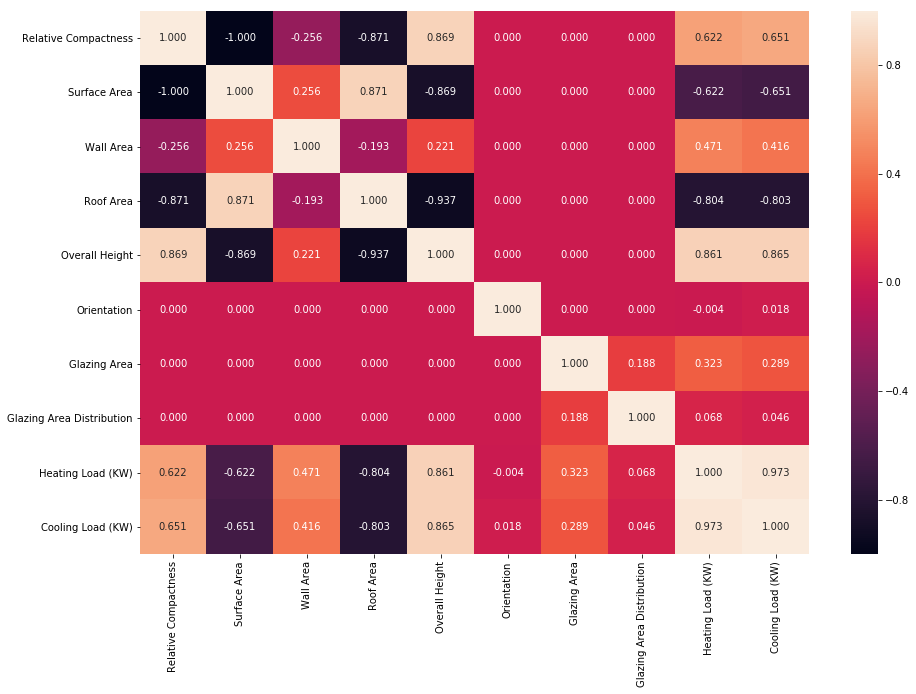

In [6]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data=data.corr(method='spearman'), annot=True, ax=ax, fmt ='.3f')

# Data Visualization

## The following graph shows how the variables are related to each other. The correlation can be visualized using a 'pairplot'

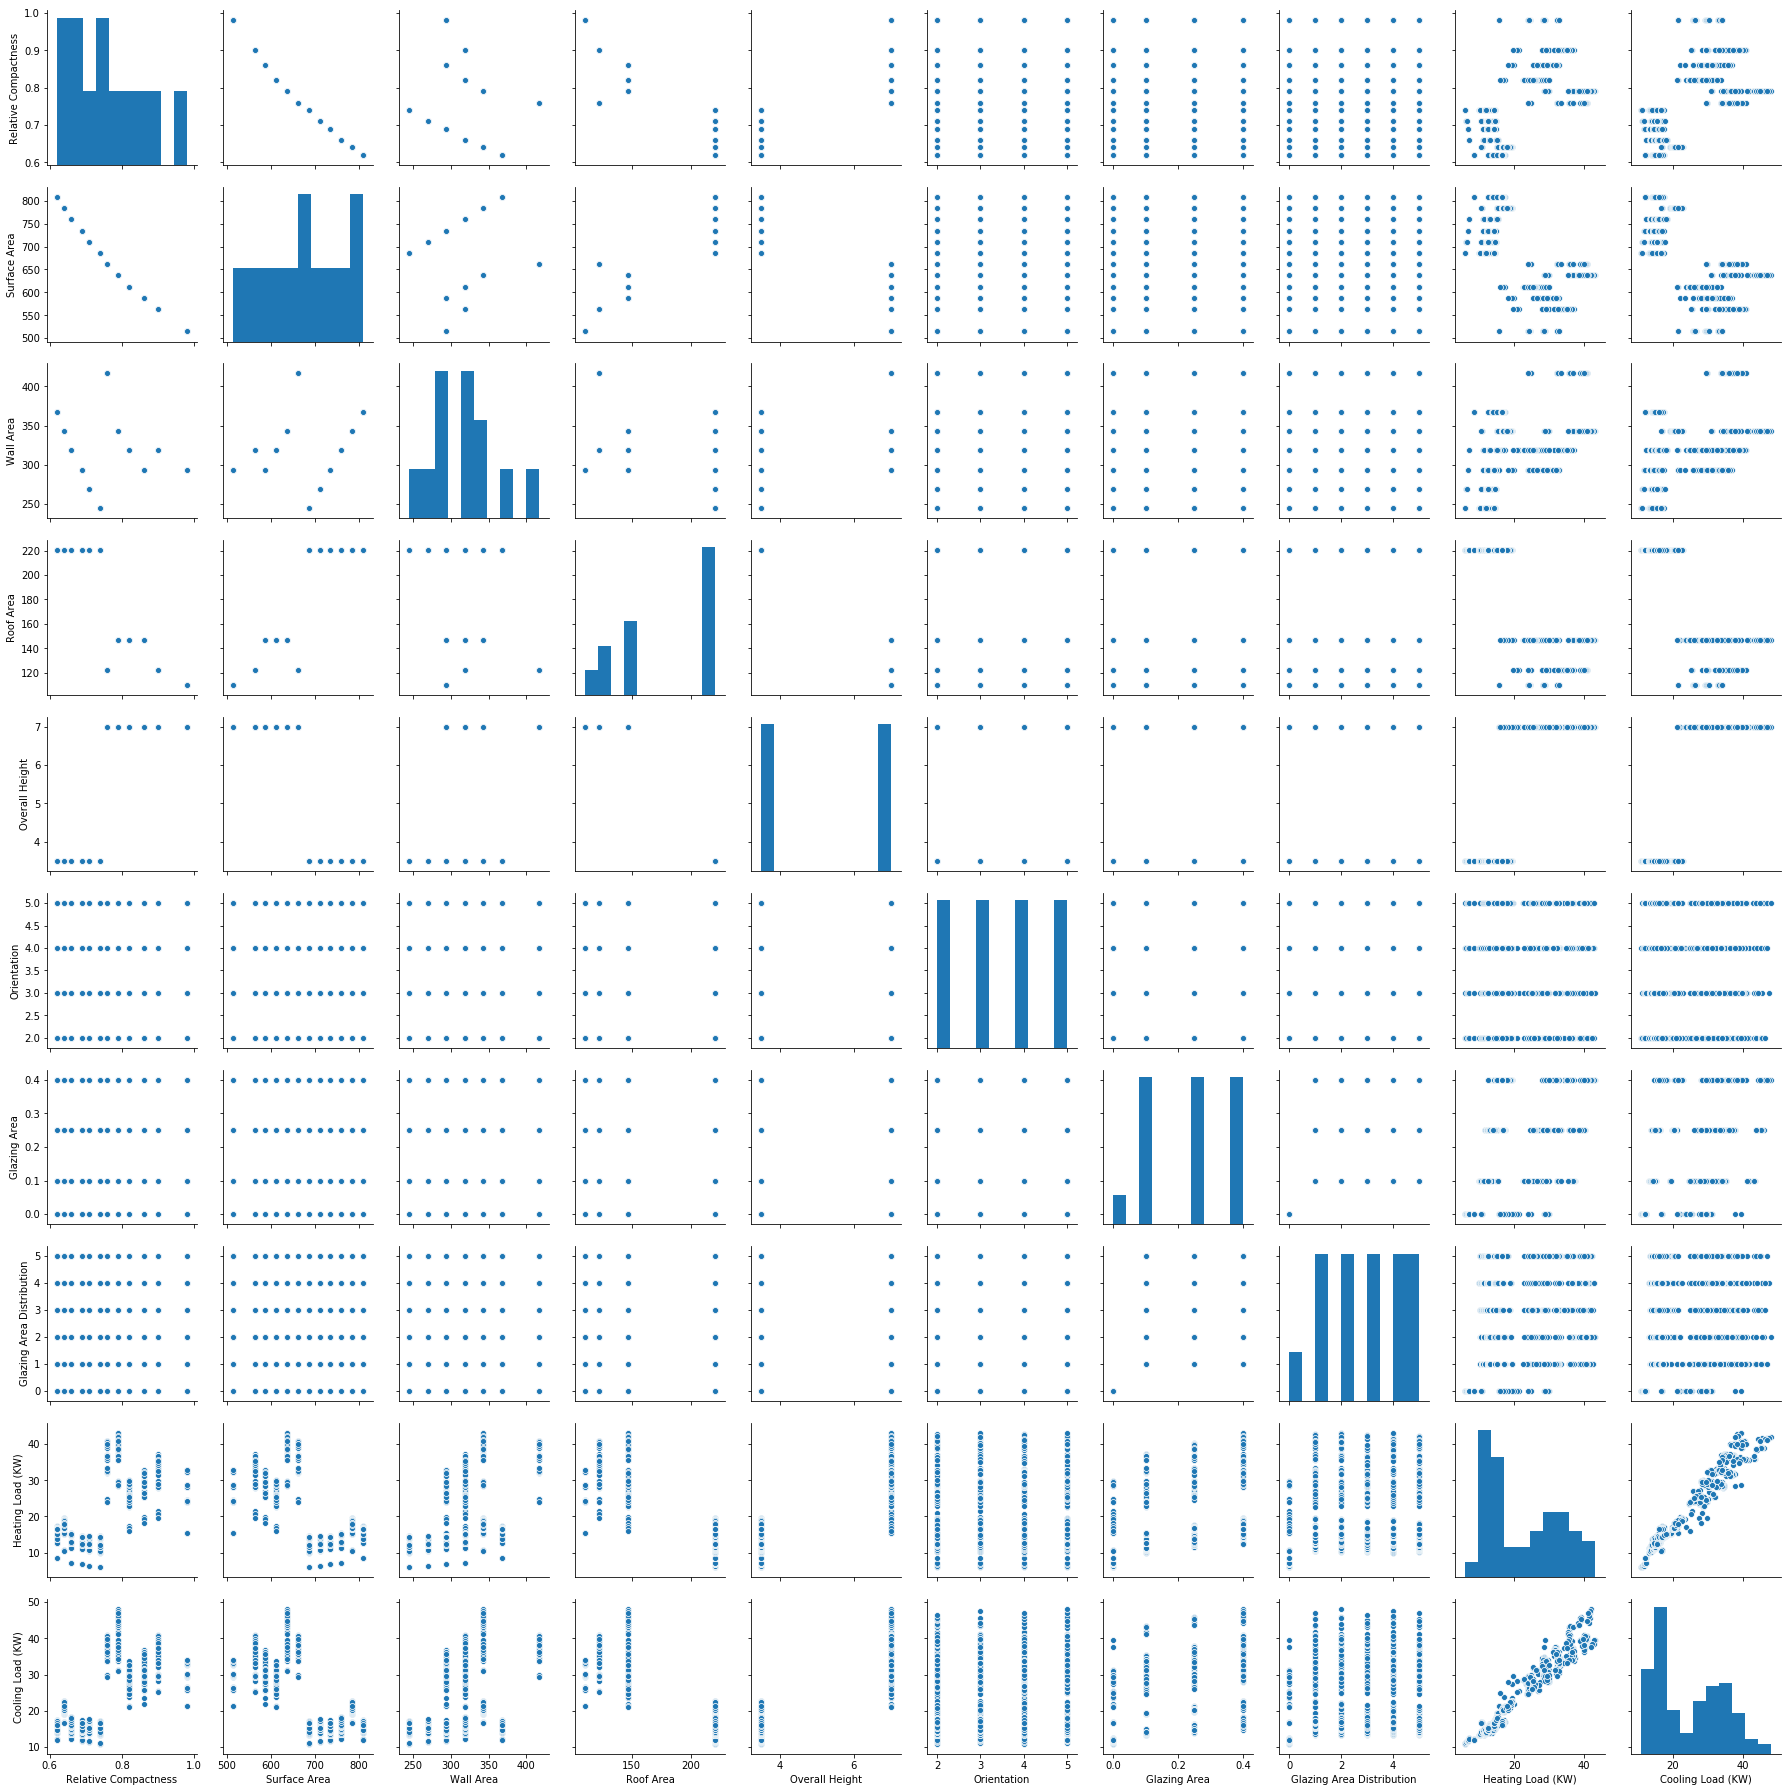

In [7]:
sns.pairplot(data,kind='scatter',height=2.5)

### The following graphs show the distribution of the Predictor variables

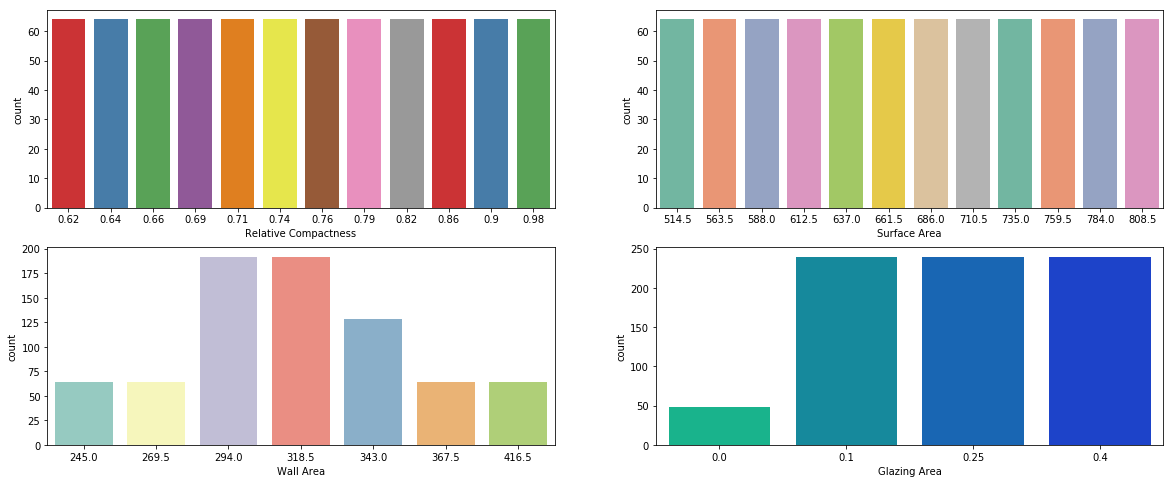

In [8]:
f, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,8))
sns.countplot('Relative Compactness',data=data,palette='Set1',ax=ax[0][0])
sns.countplot('Surface Area',data=data,palette='Set2',ax=ax[0][1])
sns.countplot('Wall Area',data=data,palette='Set3',ax=ax[1][0])
sns.countplot('Glazing Area',data=data,palette='winter_r',ax=ax[1][1])

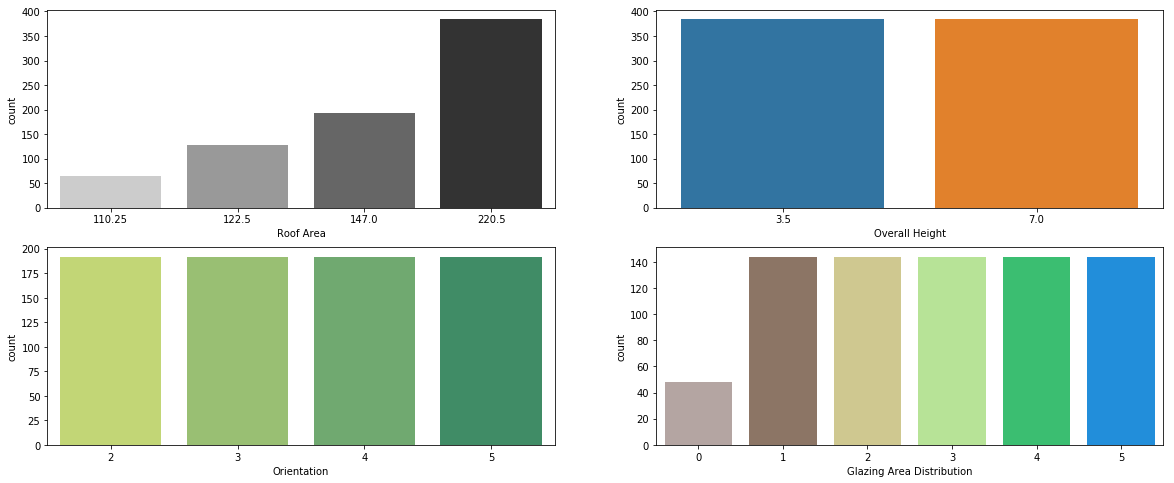

In [9]:
f, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,8))
sns.countplot('Roof Area',data=data,palette='gray_r',ax=ax[0][0])
sns.countplot('Overall Height',data=data,palette='tab10',ax=ax[0][1])
sns.countplot('Orientation',data=data,palette='summer_r',ax=ax[1][0])
sns.countplot('Glazing Area Distribution',data=data,palette='terrain_r',ax=ax[1][1])

### Using our understanding from the correlation between predictor variables and response variables, we plot a few graphs between them to better understand the relationship.

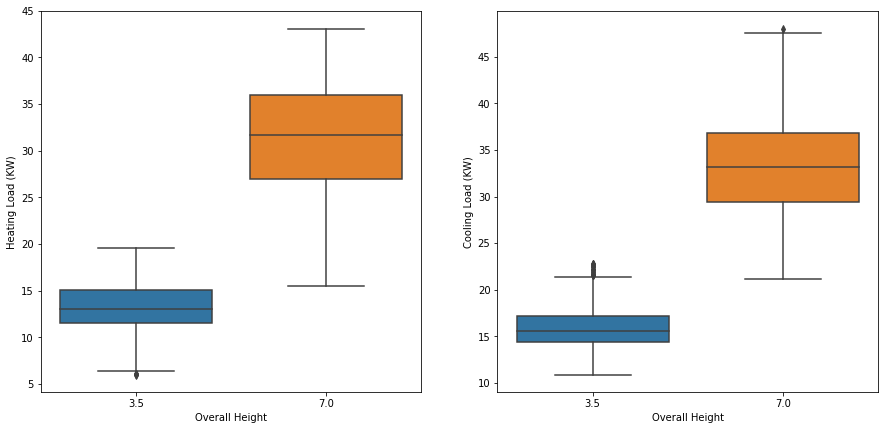

In [10]:
f, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
sns.boxplot(x = 'Overall Height',y = 'Heating Load (KW)',data=data,ax=ax[0])
sns.boxplot(x = 'Overall Height',y = 'Cooling Load (KW)',data=data,ax=ax[1])

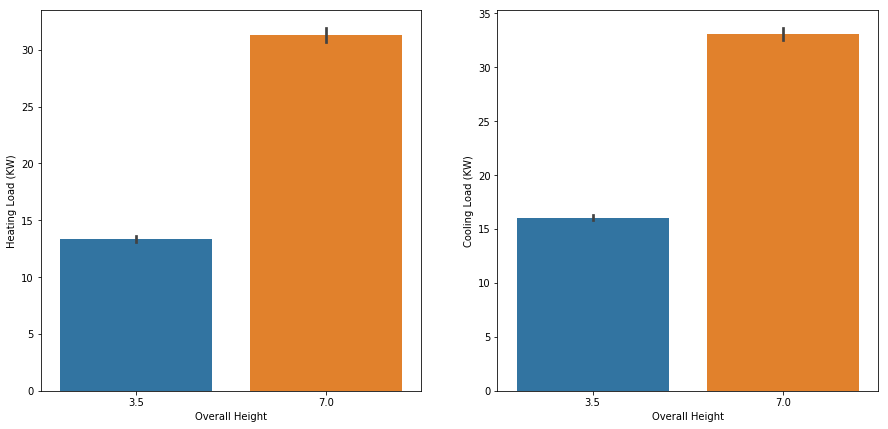

In [11]:
f, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
sns.barplot(x = 'Overall Height',y = 'Heating Load (KW)',data=data,ax=ax[0])
sns.barplot(x = 'Overall Height',y = 'Cooling Load (KW)',data=data,ax=ax[1])

### From the above plot, we understand that as the 'Overall Height' of the building increases, the 'Heating Load' and the 'Cooling Load' increase.

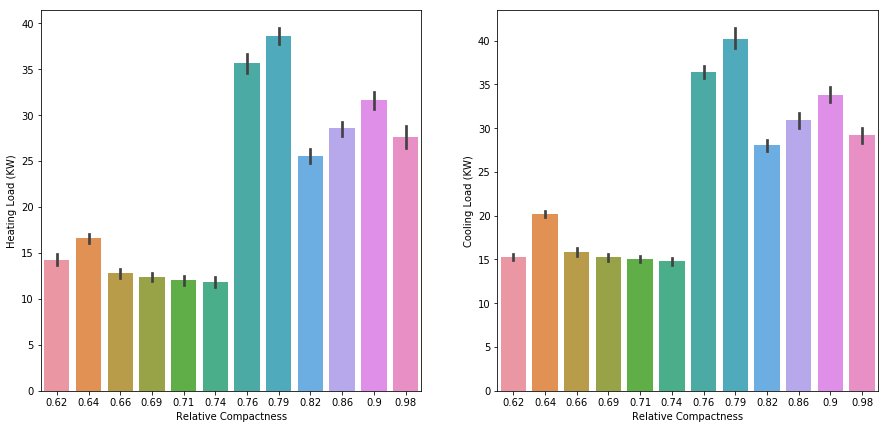

In [12]:
f, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
sns.barplot(y = 'Heating Load (KW)',x = 'Relative Compactness',data=data,ax=ax[0])
sns.barplot(y = 'Cooling Load (KW)',x = 'Relative Compactness',data=data,ax=ax[1])

### Now, we plot graphs between negatively correlated values and the response varaibles.

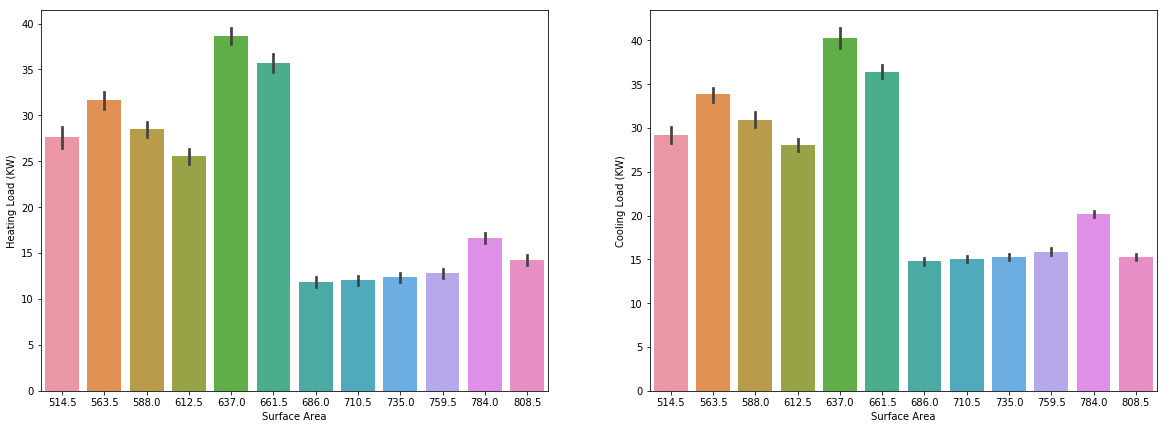

In [13]:
f, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
sns.barplot(y = 'Heating Load (KW)',x = 'Surface Area',data=data,ax=ax[0],)
sns.barplot(y = 'Cooling Load (KW)',x = 'Surface Area',data=data,ax=ax[1])

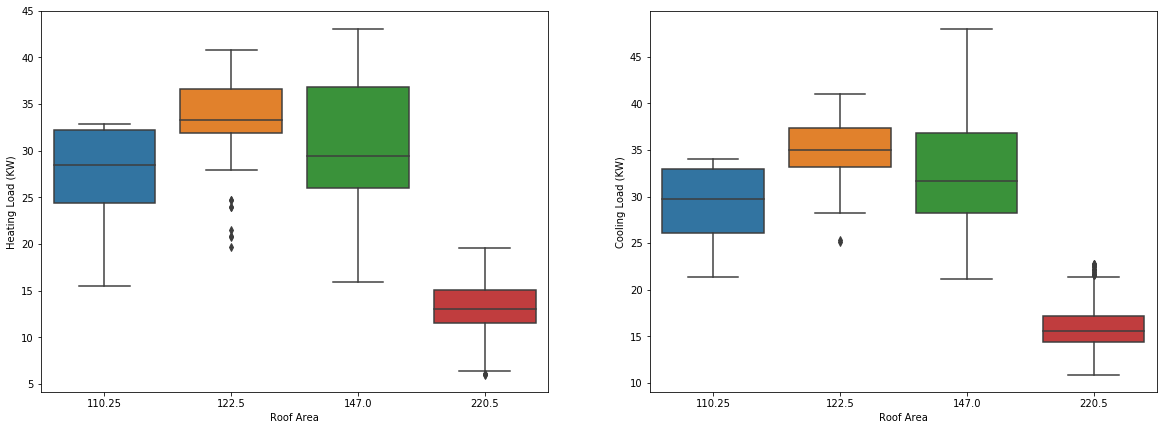

In [14]:
f, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
sns.boxplot(y = 'Heating Load (KW)',x = 'Roof Area',data=data,ax=ax[0],)
sns.boxplot(y = 'Cooling Load (KW)',x = 'Roof Area',data=data,ax=ax[1])

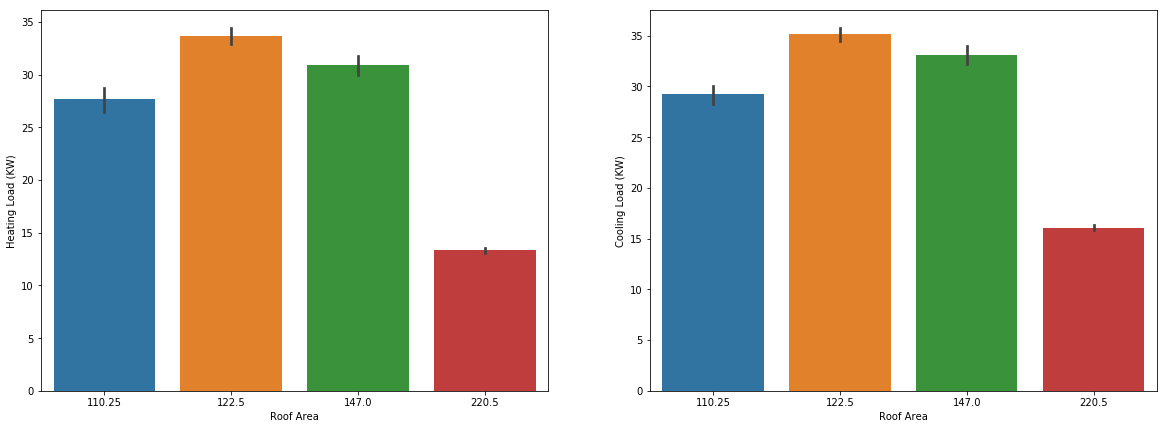

In [15]:
f, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
sns.barplot(y = 'Heating Load (KW)',x = 'Roof Area',data=data,ax=ax[0],)
sns.barplot(y = 'Cooling Load (KW)',x = 'Roof Area',data=data,ax=ax[1])

### From the above plot, we can understand the negative correlation between Roof Area & 'Heating Load, Cooling Load'

# Data Modeling

# Regression

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Splitting the data into test data. We will use the test data in the end to make predictions. Further, we will use the validation data to tune the paramaters of the model.

In [17]:
work_data , test_data = train_test_split(data, test_size = 0.2)

In [18]:
# This is the data we work on for tuning the parameters of the model
X = work_data[['Relative Compactness',
            'Surface Area',
            'Wall Area',
            'Roof Area',
            'Overall Height',
            'Orientation',
            'Glazing Area',
            'Glazing Area Distribution']]
y1 = work_data['Heating Load (KW)']
y2 = work_data['Cooling Load (KW)']

In [19]:
# This is the data where we implement our predictions
X_test = test_data[['Relative Compactness',
            'Surface Area',
            'Wall Area',
            'Roof Area',
            'Overall Height',
            'Orientation',
            'Glazing Area',
            'Glazing Area Distribution']]
y1_test = test_data['Heating Load (KW)']
y2_test = test_data['Cooling Load (KW)']

### We also observed that a few predictor variables have a high correlation between them. So, they have to be penalized so as to only use the most important predictor variables towards our output (i.e predicting the responses). So, using RandomForest Regressor will achieve better results.

In [20]:
scaler = StandardScaler()
rf = RandomForestRegressor()

pipeline_rf = Pipeline([('transformer', scaler), ('estimator', rf)])
cv = KFold(n_splits = 10)

In [22]:
# Using all variables

# R2 for y1 (Heating Load)
scores_1 = cross_val_score(pipeline_rf, X, y1, cv = cv, scoring='r2')
print('Heating: R2 of each fold')
print(scores_1) # R-squared
print('mean of R2:', scores_1.mean(),end='\n\n')

# R2 for y2 (Cooling Load)
scores_2 = cross_val_score(pipeline_rf, X, y2, cv = cv, scoring='r2')
print('Cooling: R2 of each fold')
print(scores_2) # R-squared
print('mean of R2:', scores_2.mean())

Heating: R2 of each fold
[0.99740809 0.99593535 0.99839362 0.99691667 0.99815098 0.99677249
 0.99795427 0.99797022 0.99731469 0.9970136 ]
mean of R2: 0.9973829965067071

Cooling: R2 of each fold
[0.97285662 0.98434605 0.96641948 0.96421768 0.97725837 0.9599972
 0.97469184 0.97334331 0.9581396  0.95640561]
mean of R2: 0.9687675763902582


## From the above observations, we can conclue that RandomForest Regressor performed well when all the variables were considered for both Heating and Cooling Load. We obtained a validation score of 0.997 for Heating Load and a score of 0.97 for Cooling Load.

In [23]:
# Predicting Heating Load
y1_pred = cross_val_predict(pipeline_rf, X_test, y1_test, cv=cv) 

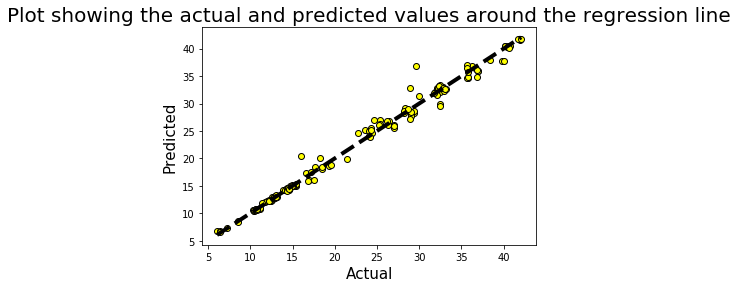

In [24]:
fig, ax = plt.subplots()
ax.scatter(y1_test, y1_pred, edgecolors=(0, 0, 0), color='yellow')
ax.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual', fontsize=15)
ax.set_ylabel('Predicted', fontsize=15)
ax.set_title('Plot showing the actual and predicted values around the regression line', fontsize = 20)
plt.show()

In [25]:
print(metrics.r2_score(y1_test, y1_pred))
print(metrics.mean_absolute_error(y1_test, y1_pred))
print(metrics.mean_squared_error(y1_test, y1_pred))

0.9888769563327624
0.6214025974025952
1.1670448722077924


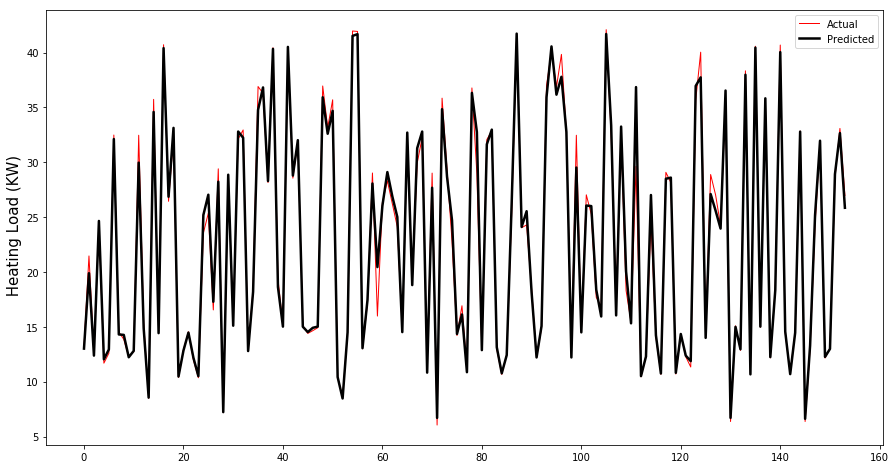

In [26]:
plt.figure(figsize=(15,8))
plt.plot(np.linspace(0,153,154), y1_test, color='red', lw = 1)
plt.plot(y1_pred, color='black', lw=2.5)
plt.ylabel(" Heating Load (KW)", fontsize = 15)
plt.legend(['Actual','Predicted'], loc='best')

### The above plot shows the comparision between the actual values and the predicted values.

Text(0, 0.5, 'Frequency')

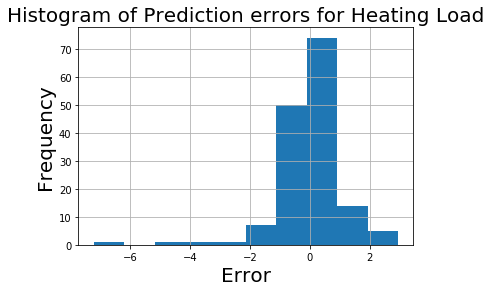

In [27]:
residual_error = y1_test - y1_pred
residual_error.hist()
plt.title('Histogram of Prediction errors for Heating Load',fontsize=20,loc='center')
plt.xlabel('Error', fontsize = 20)
plt.ylabel('Frequency',  fontsize = 20)

### The above plot shows the residuals made by the model and the frequency of them.

In [28]:
# Predicting Cooling Load
y2_pred = cross_val_predict(pipeline_rf, X_test, y2_test, cv=cv)

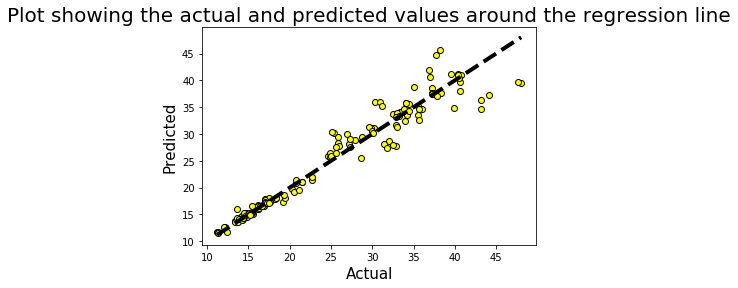

In [29]:
fig, ax = plt.subplots()
ax.scatter(y2_test, y2_pred, edgecolors=(0, 0, 0), color='yellow')
ax.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual', fontsize=15)
ax.set_ylabel('Predicted', fontsize=15)
ax.set_title('Plot showing the actual and predicted values around the regression line', fontsize = 20)
plt.show()

In [30]:
print(metrics.r2_score(y2_test, y2_pred))
print(metrics.mean_absolute_error(y2_test, y2_pred))
print(metrics.mean_squared_error(y2_test, y2_pred))

0.9422755364697274
1.383689610389614
5.434710672727291


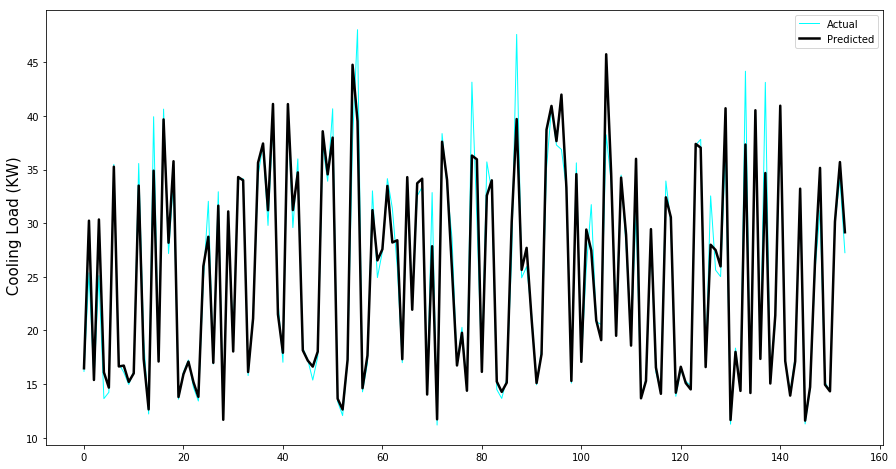

In [31]:
plt.figure(figsize=(15,8))
plt.plot(np.linspace(0,153,154), y2_test, color='cyan', lw = 1)
plt.plot(y2_pred, color='black', lw=2.5)
plt.ylabel(" Cooling Load (KW)", fontsize = 15)
plt.legend(['Actual','Predicted'], loc='best')

### The above plot compares the predicted values and the actual values.

Text(0, 0.5, 'Frequency')

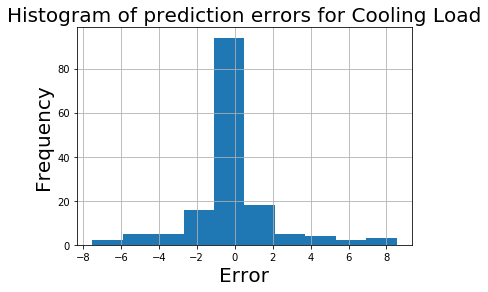

In [32]:
residual_error = y2_test - y2_pred
residual_error.hist()
plt.title('Histogram of prediction errors for Cooling Load',fontsize=20,loc='center')
plt.xlabel('Error', fontsize = 20)
plt.ylabel('Frequency',  fontsize = 20)

### The above plot shows the residuals made by the model and the frequency of them.

## Thus, RandomForest Regressor has a superior performance and the above results show that the Heating Load and Cooling Load were predicted with high accuracy.

# Classification

### We are building a model to classify if a building has more Cooling Load, or less cooling Load than the Heating Load, or approximately equal Cooling Load and Heating Load

In [34]:
data['Energy Range'] = data['Heating Load (KW)'] - data['Cooling Load (KW)']
conditions = [(data['Energy Range'] > 1), (data['Energy Range'] < -1)]
choices = [1,2]
data['Energy Class'] = np.select(conditions, choices, default=3)

In [35]:
data['Energy Class'].unique()

array([2, 3, 1])

In [36]:
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load (KW),Cooling Load (KW),Energy Range,Energy Class
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,-5.78,2
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,-5.78,2
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,-5.78,2
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,-5.78,2
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,-7.44,2


In [37]:
# work_data will be used to divide into training and validation set
# test_data can be used to perform predictions in the end.
work_data , test_data = train_test_split(data, test_size = 0.2)

In [38]:
# This is the data where we tune the parameters of the model
X = work_data.drop(columns=['Heating Load (KW)', 'Cooling Load (KW)', 'Energy Range','Energy Class'],axis =1)
y = work_data['Energy Class']

In [39]:
# This is the test data where we implement our predictions
X_test = test_data.drop(columns=['Heating Load (KW)', 'Cooling Load (KW)', 'Energy Range','Energy Class'],axis =1)
y_test = test_data['Energy Class']

In [40]:
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [41]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf"),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(criterion='gini',random_state=0)]

for i in classifiers:
    model = Pipeline([('transformer', scaler), ('classifier', i)])
    model.fit(x_train,y_train)   
    print(i)
    print("model score: ", model.score(x_val, y_val), end='\n\n')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
model score:  0.7642276422764228

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model score:  0.7886178861788617

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,


## Thus, we observe that DecisionTree Classifier performed well with a model score of 0.837. Hence, we use this model for predictions on the test set.

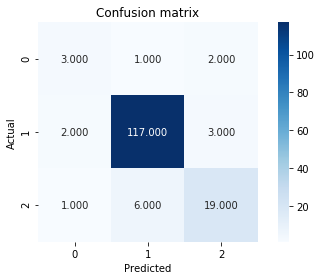

In [42]:
model = Pipeline(steps= [('transformer', scaler), ('classifier',GradientBoostingClassifier())])
model.fit(x_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [43]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print(accuracy)
print(error)
print(precision)
print(recall)
print(F1_score)

0.9025974025974026
0.09740259740259738
[0.5        0.94354839 0.79166667]
[0.5        0.95901639 0.73076923]
[0.5        0.95121951 0.76      ]


Below, we analyze our results (i.e Comparision between actual and predicted values)

In [44]:
# The following are the first 37 actual and predicted values.
print('Actual    :',    y_test.values[0:37])
print('Predicted :',    y_pred[0:37])

Actual    : [2 2 3 2 2 2 2 2 2 3 3 2 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2]
Predicted : [1 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 3 2 2 2 2 1 2 2 2 2 2 2 2 2 3 2 2 2 2 2]


In [45]:
# The following are the actual and predicted values.
print('Actual    :',    y_test.values[37:74])
print('Predicted :',    y_pred[37:74])

Actual    : [2 2 3 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 3 3 2 2 2 2 2 2 1 2 2 3 2 2]
Predicted : [2 2 3 1 3 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 3 3 2 2 2 2 2 2 3 2 2 3 2 2]


In [46]:
y_test.value_counts()

2    122
3     26
1      6
Name: Energy Class, dtype: int64

## We understand that there are more number of values from class '2', and almost all of them were predicted accurately.

# Clustering

In [47]:
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load (KW),Cooling Load (KW),Energy Range,Energy Class
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,-5.78,2
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,-5.78,2
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,-5.78,2
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,-5.78,2
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,-7.44,2


In [48]:
X = data.drop(columns=['Heating Load (KW)','Cooling Load (KW)', 'Energy Range', 'Energy Class'], axis = 1)

In [49]:
X.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [50]:
data['Energy Class'].head()

0    2
1    2
2    2
3    2
4    2
Name: Energy Class, dtype: int64

In [51]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

## K-Means clustering

In [66]:
# Kmeans using all variables and random initialization of centroids
clustering = KMeans(n_clusters=3, init='random', n_init=10, random_state=0).fit(X_scaled)
clusters = clustering.labels_

print(clusters)
print(np.unique(clusters))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [67]:
clustering.cluster_centers_

array([[ 1.19037947e+00, -1.15965902e+00, -2.80975743e-01,
        -9.95128801e-01,  1.00000000e+00,  0.00000000e+00,
         2.72525058e-15, -6.84637532e-16],
       [ 1.02483001e-01, -2.55124984e-01,  1.40487872e+00,
        -9.27279110e-01,  1.00000000e+00,  0.00000000e+00,
        -1.05471187e-15, -4.08816499e-16],
       [-8.27747317e-01,  8.58147673e-01, -2.80975743e-01,
         9.72512237e-01, -1.00000000e+00,  0.00000000e+00,
         3.39311912e-15,  5.14634631e-17]])

In [68]:
data['clusters'] = clusters

[[ 22  36   0]
 [158  58 346]
 [ 76  34  38]]


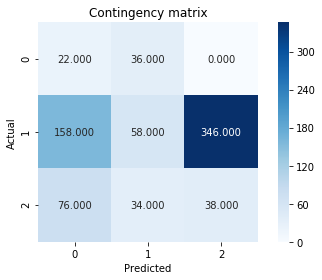

In [69]:
cont_matrix = metrics.cluster.contingency_matrix(data['Energy Class'], data['clusters'])
print(cont_matrix)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [70]:
adjusted_rand_index = metrics.adjusted_rand_score(data['Energy Class'], clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")

print([adjusted_rand_index, silhouette_coefficient])

[0.1663296545529728, 0.2946662361139033]


In [71]:
accuracy = metrics.accuracy_score(data['Energy Class'], clusters)
error = 1 - accuracy
precision = metrics.precision_score(data['Energy Class'], clusters, average = None)
recall = metrics.recall_score(data['Energy Class'], clusters, average = None)
F1_score = metrics.f1_score(data['Energy Class'], clusters, average = None)

print([accuracy, error, precision, recall, F1_score])
print(accuracy)

[0.4973958333333333, 0.5026041666666667, array([0.        , 0.28125   , 0.90104167, 0.        ]), array([0.        , 0.62068966, 0.61565836, 0.        ]), array([0.        , 0.38709677, 0.73150106, 0.        ])]
0.4973958333333333


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


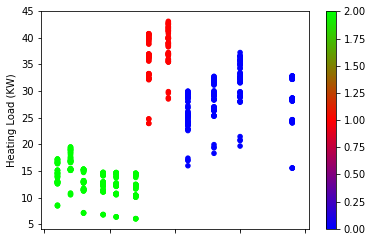

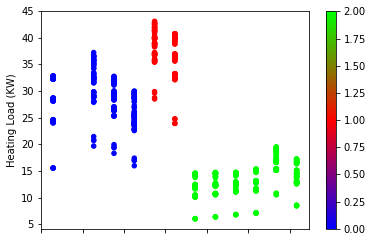

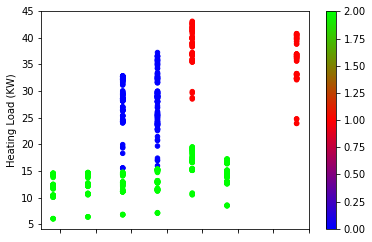

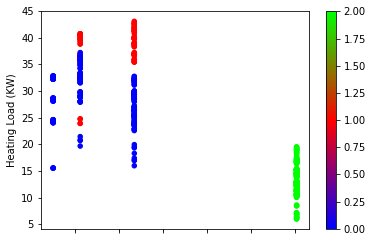

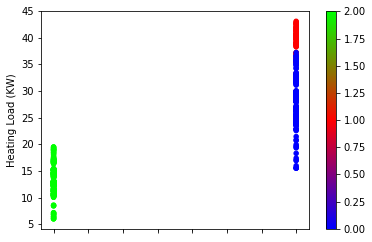

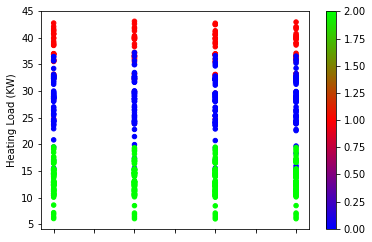

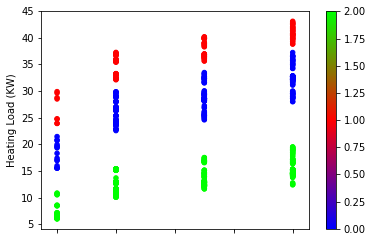

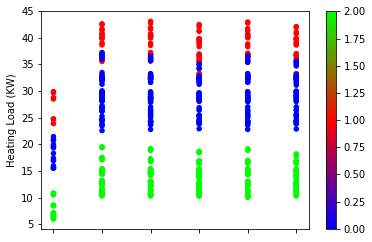

In [72]:
ax = data.plot(kind = 'scatter', x = 'Relative Compactness', y = 'Heating Load (KW)', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Surface Area', y = 'Heating Load (KW)', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Wall Area', y = 'Heating Load (KW)', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Roof Area', y = 'Heating Load (KW)', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Overall Height', y = 'Heating Load (KW)', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Orientation', y = 'Heating Load (KW)', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Glazing Area', y = 'Heating Load (KW)', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Glazing Area Distribution', y = 'Heating Load (KW)', c = clusters, colormap = plt.cm.brg)


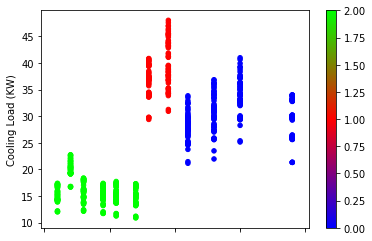

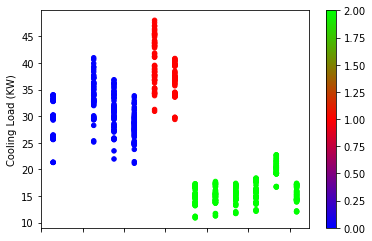

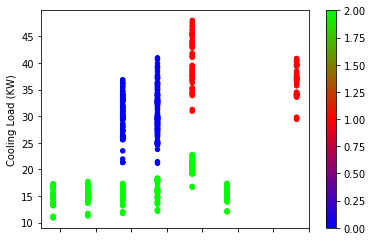

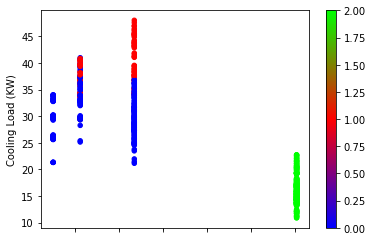

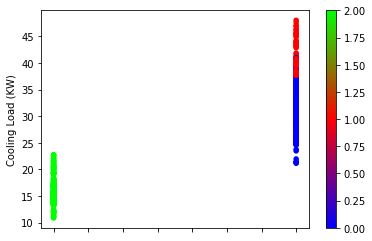

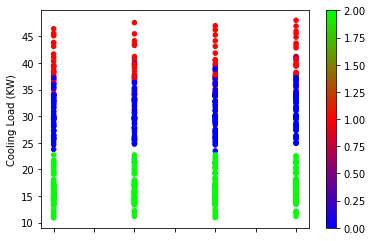

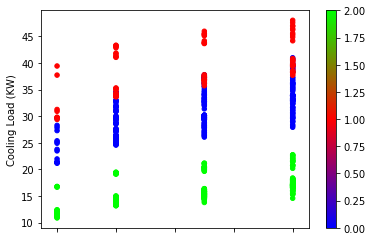

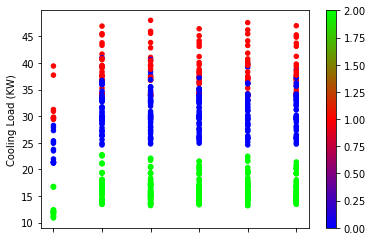

In [73]:
ax = data.plot(kind = 'scatter', x = 'Relative Compactness', y = 'Cooling Load (KW)', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Surface Area', y = 'Cooling Load (KW)', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Wall Area', y = 'Cooling Load (KW)', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Roof Area', y = 'Cooling Load (KW)', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Overall Height', y = 'Cooling Load (KW)', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Orientation', y = 'Cooling Load (KW)', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Glazing Area', y = 'Cooling Load (KW)', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Glazing Area Distribution', y = 'Cooling Load (KW)', c = clusters, colormap = plt.cm.brg)


## According to the result, adjusted rand index is the highest with K-Means clustering (0.1663), and the silhouette coefficient is the highest with Hierarchical clustering with single linkage method (0.3341), excluding DBSCAN analysis.

# The trade-off between the rand index and silhouette coefficient seem good with single linkage method, and hence it is the best performing clustering model.